In [48]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas
RANDOM_SEED = 42

# Specify each path

In [49]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [50]:
NUM_CLASSES = 7

# Dataset reading

In [51]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [52]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [55]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)
model.built = True

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1147 (4.48 KB)
Trainable params: 1147 (4.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [57]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [58]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/33 [..............................] - ETA: 5s - loss: 2.1672 - accuracy: 0.0625
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 1.9726 - accuracy: 0.1262 - val_loss: 1.8469 - val_accuracy: 0.2400
Epoch 2/1000
 1/33 [..............................] - ETA: 0s - loss: 1.8508 - accuracy: 0.2031
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 1ms/step - loss: 1.7970 - accuracy: 0.2447 - val_loss: 1.6704 - val_accuracy: 0.3459
Epoch 3/1000
 1/33 [..............................] - ETA: 0s - loss: 1.6872 - accuracy: 0.2969
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 1ms/step - loss: 1.6822 - accuracy: 0.3138 - val_loss: 1.5564 - val_accuracy: 0.3851
Epoch 4/1000
 1/33 [..............................] - ETA: 0s - loss: 1.7482 - accuracy: 0.2969
E

/Users/shrijayan.rajendran/Desktop/hand-gesture-recognition-mediapipe/hand_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 1ms/step - loss: 1.4614 - accuracy: 0.4084 - val_loss: 1.2944 - val_accuracy: 0.5018
Epoch 8/1000
 1/33 [..............................] - ETA: 0s - loss: 1.3612 - accuracy: 0.4531
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 1ms/step - loss: 1.4191 - accuracy: 0.4318 - val_loss: 1.2500 - val_accuracy: 0.5504
Epoch 9/1000
 1/33 [..............................] - ETA: 0s - loss: 1.3621 - accuracy: 0.4688
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 1ms/step - loss: 1.3795 - accuracy: 0.4596 - val_loss: 1.2038 - val_accuracy: 0.5838
Epoch 10/1000
 1/33 [..............................] - ETA: 0s - loss: 1.4399 - accuracy: 0.4297
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [===========

In [59]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 504us/step - loss: 0.3052 - accuracy: 0.9413


In [60]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [61]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 30ms/step
[1.06419455e-02 9.79382157e-01 9.71683115e-03 2.82405294e-10
 2.55288702e-04 7.09685555e-09 3.80773167e-06]
1


# Confusion matrix

44/44 [==============================] - 0s 353us/step


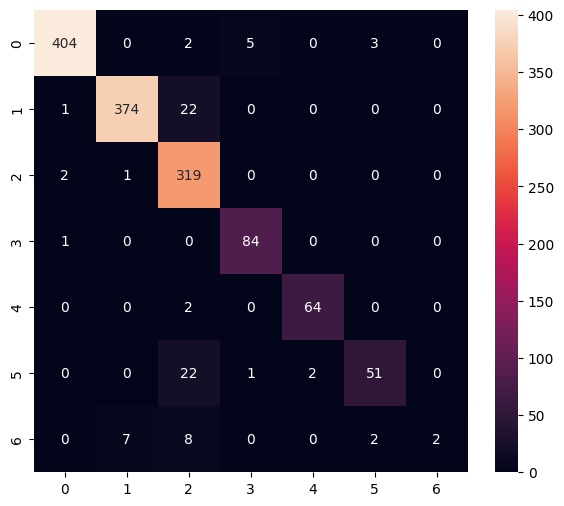

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       414
           1       0.98      0.94      0.96       397
           2       0.85      0.99      0.92       322
           3       0.93      0.99      0.96        85
           4       0.97      0.97      0.97        66
           5       0.91      0.67      0.77        76
           6       1.00      0.11      0.19        19

    accuracy                           0.94      1379
   macro avg       0.95      0.81      0.82      1379
weighted avg       0.95      0.94      0.94      1379



In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [63]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/shrijayan.rajendran/Desktop/hand-gesture-recognition-mediapipe/hand_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmplknj9hfh/assets


INFO:tensorflow:Assets written to: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmplknj9hfh/assets
2024-06-06 22:42:42.681085: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-06-06 22:42:42.681099: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-06-06 22:42:42.681239: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmplknj9hfh
2024-06-06 22:42:42.681894: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-06-06 22:42:42.681900: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmplknj9hfh
2024-06-06 22:42:42.683953: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-06-06 22:42:42.710512: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

6708

# Inference test

In [65]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [66]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [44]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [45]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 266 µs, sys: 146 µs, total: 412 µs
Wall time: 331 µs


In [46]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.7331922e-03 9.8735249e-01 9.7261062e-03 3.2223422e-11 5.6260376e-07
 1.8665816e-04 9.0117743e-07]
1
